In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import (
    train_test_split,
    StratifiedShuffleSplit,
    LeaveOneOut,
)
import matplotlib.pyplot as plt
import seaborn as sns

# 载入数据

In [2]:
iris = load_iris()

# train_test_split(x, y, test_size, random_state, *options)
- param:
    - x 数据集的特征值
    - y 数据集的标签值
    - test_size 测试集的大小,一般为float
    - random_state 随机数种子,不同的种子会造成不同的随机采样结果。相同的种子采样结果相同
- return:
    - x_train, x_test, y_train, y_tes
    - 训练集的特征值x_train 测试集的特征值x_test 训练集的目标值y_train 测试集的目标值y_test

In [3]:
x_train, x_val, y_train, y_val = train_test_split(
    iris.data, iris.target, test_size=0.2, random_state=0
)

In [4]:
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((120, 4), (30, 4), (120,), (30,))

## 绘图查看,数据不均匀

<AxesSubplot: ylabel='count'>

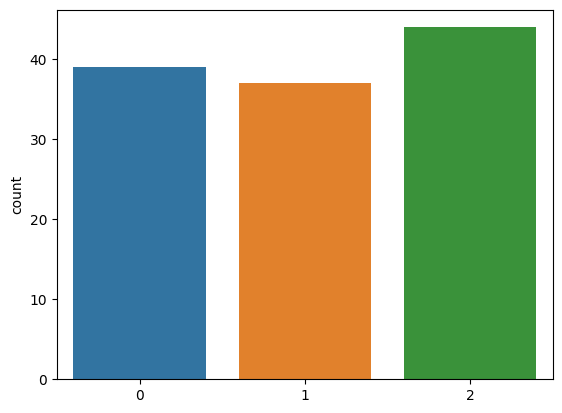

In [5]:
sns.countplot(x=y_train)

<AxesSubplot: ylabel='count'>

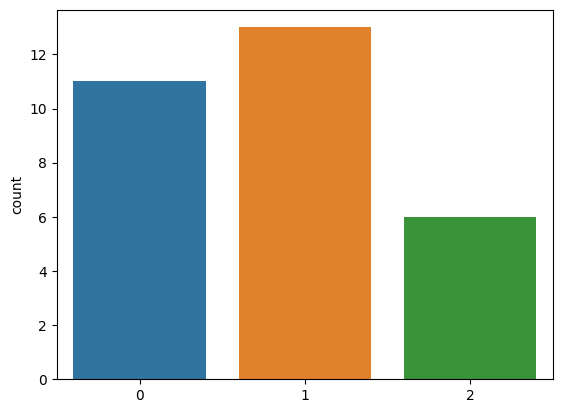

In [6]:
sns.countplot(x=y_val)

# 分层划分 StratifiedShuffleSplit(n_splits=10, test_size='default', train_size=None, random_state=None)
参数:
- n_splits是将训练数据分成train/test对的组数，可根据需要进行设置，默认为10
- 参数test_size和train_size是用来设置train/test对中train和test所占的比例。例如：
    1. 提供10个数据num进行训练和测试集划分
    2. 设置train_size=0.8 test_size=0.2
    3. train_num=numtrain_size=8 test_num=numtest_size=2
    4. 即10个数据，进行划分以后8个是训练数据，2个是测试数据

In [7]:
#                             只分为1组
sss1 = StratifiedShuffleSplit(n_splits=1, test_size=0.2)

In [8]:
for train_i, val_i in sss1.split(iris.data, iris.target):
    # 测试能不能正常使用
    print(len(train_i))  # 120
    print(len(val_i))  # 30

    x_train_sss = iris.data[train_i]
    y_train_sss = iris.target[train_i]

    x_val_sss = iris.data[val_i]
    y_val_sss = iris.target[val_i]

120
30


## 绘图查看,数据更均匀

<AxesSubplot: ylabel='count'>

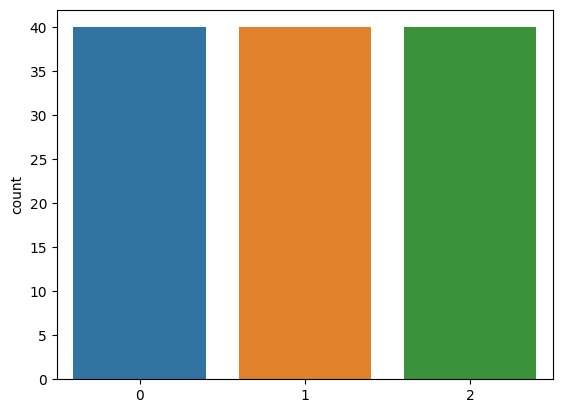

In [9]:
sns.countplot(x=y_train_sss)

<AxesSubplot: ylabel='count'>

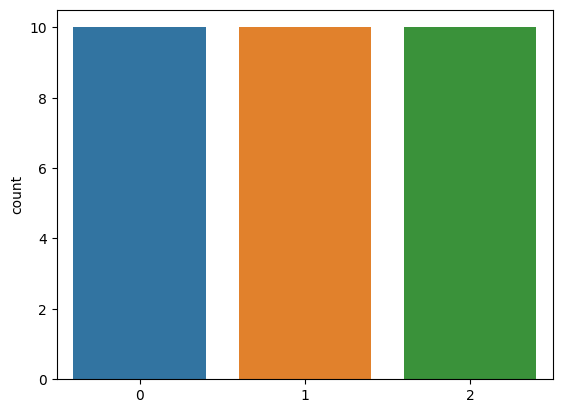

In [10]:
sns.countplot(x=y_val_sss)

# LeaveOneOut留一法
留下其中一个数据作为测试,适用于小数据量

In [14]:
data = [1, 2, 3, 4]

In [15]:
loo = LeaveOneOut()

In [16]:
for train, val in loo.split(data):
    print(train, val)

[1 2 3] [0]
[0 2 3] [1]
[0 1 3] [2]
[0 1 2] [3]
